In [1]:
import pandas as pd
import keras, keras.layers as L
from tensorflow.python.util import deprecation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Exploring NFL data

In [2]:
data = pd.read_csv('Regression Model Data.csv')

In [3]:
data.shape

(4580, 28)

In [4]:
data.head()

,Week,Spread,DVOA EGO,Line For Rating,Opp Line Against Rating,Opp Line Against Rating EGO Adj,Opp Line Against Rating Correlation,Line Against Rating,Opp Line For Rating,Opp Line For Rating EGO Adj,...,Opp Rushing For Rating Correlation,Passing For Rating,Opp Passing Against Rating,Opp Passing Against Rating EGO Adj,Opp Passing Against Rating Correlation,Passing Against Rating,Opp Passing For Rating,Opp Passing For Rating EGO Adj,Opp Passing For Rating Correlation,EGO To Result Diff
0,6,13.0,-11.74,28,100,0.000000,0.157523,42,72,0.000000,...,0.953304,58,87,0.0,-0.393521,37,71,7.685647,-0.785133,10.74
1,6,-3.0,3.16,42,72,-0.453435,0.837533,59,7,0.000000,...,0.999315,5,40,0.0,0.519390,60,83,0.000000,0.666238,-16.16
2,6,-3.0,4.88,72,74,-0.580544,0.678077,84,28,0.000000,...,0.005199,32,60,0.0,-0.773204,95,36,-0.276187,0.452117,-6.88
3,6,-1.0,-1.15,50,32,4.307271,0.713920,58,6,6.749132,...,0.320263,27,19,0.0,0.203142,64,69,0.000000,0.383894,-1.85
4,6,3.0,-4.88,28,84,-1.103963,0.909140,74,72,0.000000,...,0.489621,36,95,0.0,0.424389,60,32,0.000000,0.470497,6.88


# Correlation matrix/heatmap

(28, 0)

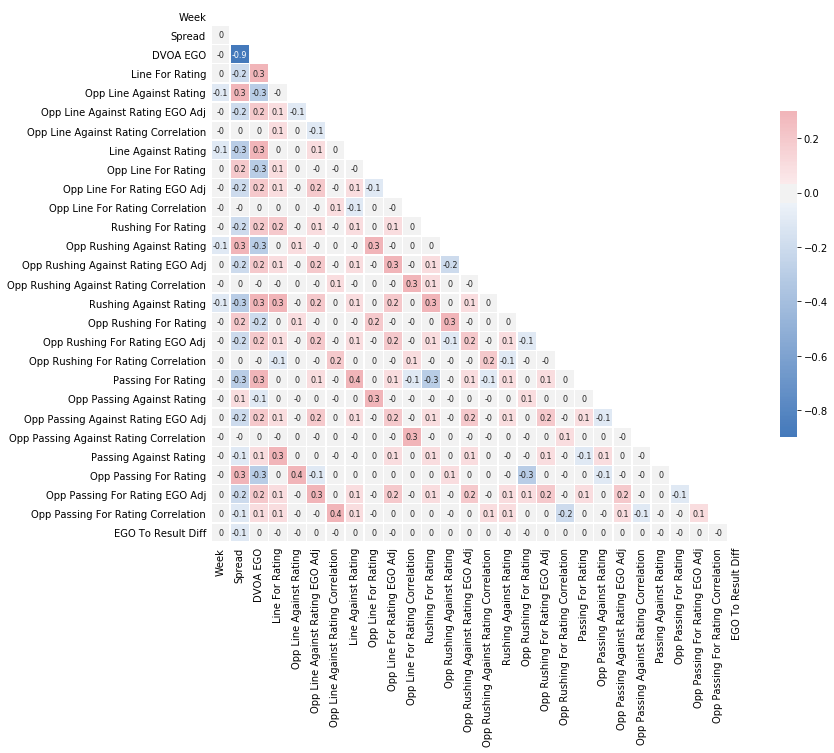

In [5]:
corr = data.corr(method='pearson')
corr = corr.round(1)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(250, 10, as_cmap=True)

plt.figure(figsize=(12,12)) 
ax = sns.heatmap(data=corr, mask=mask, annot=True, cmap=cmap, center=0, vmax=.3, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"fontsize":8})
ax.tick_params(axis='both', which='both', length=0, pad=5)
ax.set_ylim(28, 0)

+  <b> Zero correlation with target variable. At least zero *linear* correlation...

## Target variable distribution

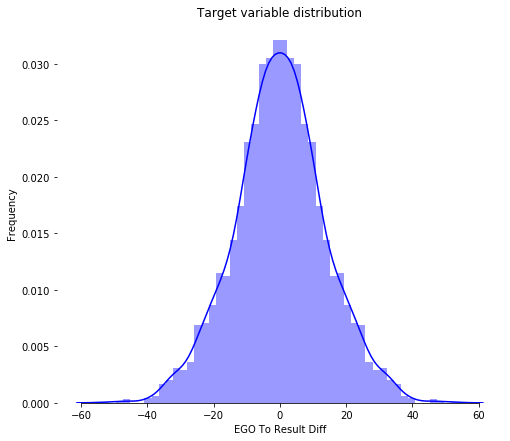

In [6]:
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(data['EGO To Result Diff'], color="b");
ax.set(ylabel="Frequency")
ax.set(xlabel="EGO To Result Diff")
ax.set(title="Target variable distribution")
sns.despine(trim=True, left=True)
plt.show()

+  <b> Target variable is normally distributed

## Features distribution

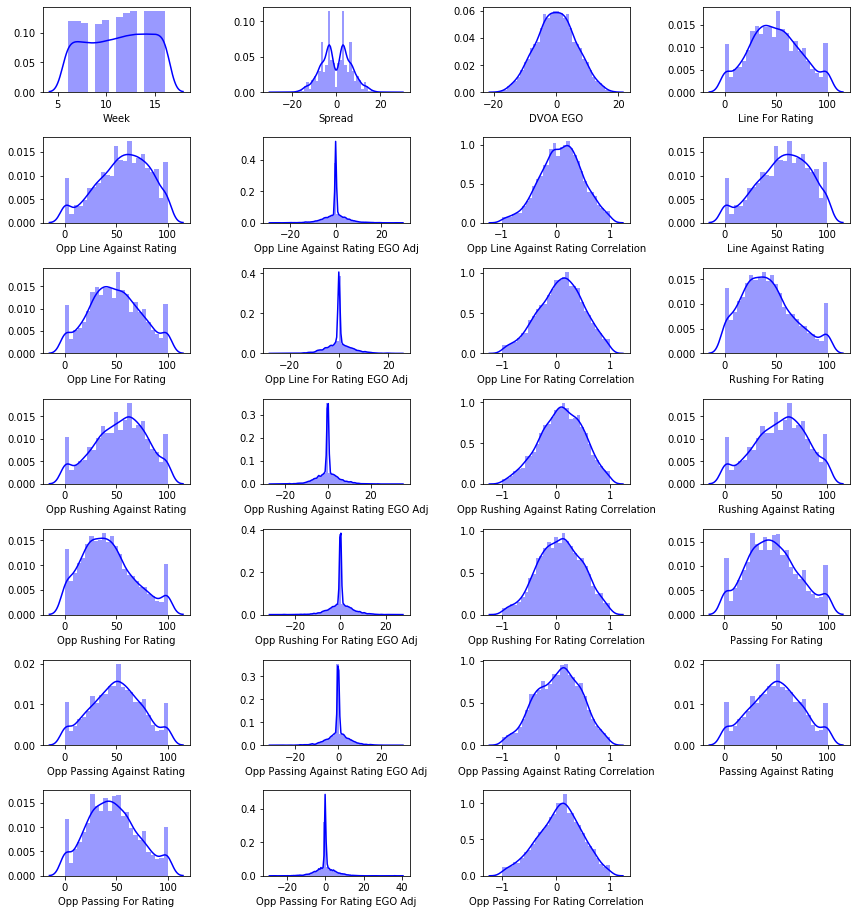

In [7]:
num_attributes = data.select_dtypes(exclude='object').drop(['EGO To Result Diff'], axis=1).copy()
fig = plt.figure(figsize=(12,16))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), color='blue')
    plt.xlabel(num_attributes.columns[i])
plt.tight_layout()
plt.show()

+ <b> Some features have distribution close to normal, some features are skewed

## How does target variable correspond with features?

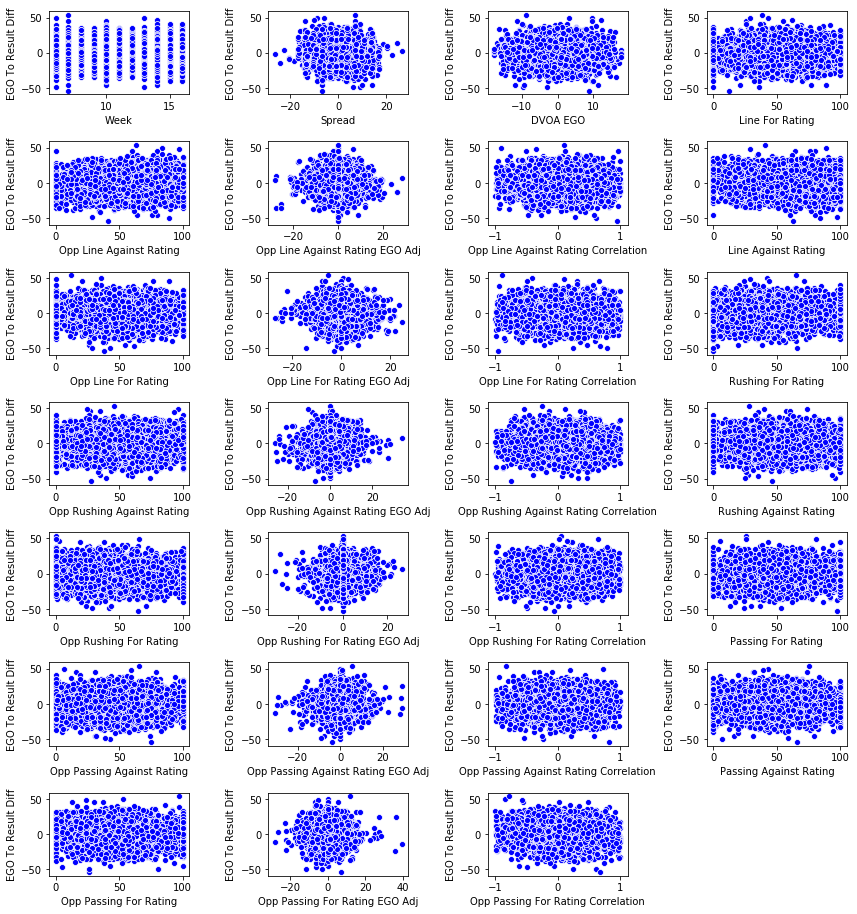

In [8]:
f = plt.figure(figsize=(12,16))
for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], data['EGO To Result Diff'], color='blue')
plt.tight_layout()
plt.show()

+ <b> There is no strong dependency between features and target variable. The data looks random.

## Predicting target on the raw data without data processing

### scaling data

In [9]:
X = data.drop(columns = ['EGO To Result Diff'])
y = data['EGO To Result Diff']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=9000)

In [11]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [12]:
model_keras = keras.models.Sequential()

model_keras.add(L.InputLayer([X.shape[1]]))
model_keras.add(L.Dense(256, activation = 'relu'))
model_keras.add(L.Dense(128, activation = 'relu'))
model_keras.add(L.Dense(64, activation = 'relu'))
model_keras.add(L.Dense(32, activation = 'relu'))
model_keras.add(L.Dense(1))

model_keras.compile(loss = 'mape', optimizer = 'adam', metrics=['mape'])
model_keras.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 100)

Train on 3664 samples, validate on 916 samples
Epoch 1/100
3664/3664 [==============================] - 2s 490us/step - loss: 103.2662 - mape: 103.2662 - val_loss: 99.9551 - val_mape: 99.9551
Epoch 2/100
3664/3664 [==============================] - 1s 230us/step - loss: 101.2500 - mape: 101.2500 - val_loss: 100.5071 - val_mape: 100.5071
Epoch 3/100
3664/3664 [==============================] - 1s 312us/step - loss: 102.7834 - mape: 102.7834 - val_loss: 101.0094 - val_mape: 101.0094
Epoch 4/100
3664/3664 [==============================] - 1s 306us/step - loss: 100.5425 - mape: 100.5424 - val_loss: 100.6682 - val_mape: 100.6682
Epoch 5/100
3664/3664 [==============================] - 1s 281us/step - loss: 100.1151 - mape: 100.1151 - val_loss: 100.5555 - val_mape: 100.5555
Epoch 6/100
3664/3664 [==============================] - 1s 342us/step - loss: 99.9470 - mape: 99.9470 - val_loss: 100.3666 - val_mape: 100.3665
Epoch 7/100
3664/3664 [==============================] - 1s 265us/step - lo

Epoch 57/100
3664/3664 [==============================] - 0s 107us/step - loss: 73.3450 - mape: 73.3450 - val_loss: 124.8361 - val_mape: 124.8361
Epoch 58/100
3664/3664 [==============================] - 0s 119us/step - loss: 73.2287 - mape: 73.2287 - val_loss: 126.6847 - val_mape: 126.6847
Epoch 59/100
3664/3664 [==============================] - 0s 109us/step - loss: 73.5733 - mape: 73.5733 - val_loss: 123.8853 - val_mape: 123.8853
Epoch 60/100
3664/3664 [==============================] - 0s 126us/step - loss: 72.5723 - mape: 72.5723 - val_loss: 125.8075 - val_mape: 125.8075
Epoch 61/100
3664/3664 [==============================] - 1s 150us/step - loss: 71.3436 - mape: 71.3436 - val_loss: 128.3833 - val_mape: 128.3833
Epoch 62/100
3664/3664 [==============================] - 0s 124us/step - loss: 70.6689 - mape: 70.6689 - val_loss: 127.4399 - val_mape: 127.4399
Epoch 63/100
3664/3664 [==============================] - 0s 93us/step - loss: 70.4514 - mape: 70.4513 - val_loss: 127.0814 

In [13]:
model_keras.evaluate(np.array(X_test), np.array(y_test))

916/916 [==============================] - 0s 48us/step


[171.5900361173538, 171.59002685546875]

In [14]:
def test_table(model, X_test, y_test):
    test_table = pd.DataFrame([], index=range(0, X_test.shape[0]))
    test_table['y'] = y_test.reset_index(drop=True)
    test_table['y'] = np.exp(test_table['y'])-100
    test_table['y_pred'] = model.predict(X_test)
    test_table['delta'] = test_table['y'] - test_table['y_pred']
    test_table['error_percent'] = test_table['delta']/test_table['y']*100
    mape = test_table['error_percent'].mean()
    print ("Mean absolute percentage error: {}".format(mape)) 

In [15]:
test_table(model_keras, X_test, y_test)

Mean absolute percentage error: 99.7596304976974


### CatBoost

In [16]:
from catboost import CatBoostRegressor
model_catboost = CatBoostRegressor(
        iterations=2000, 
        learning_rate=0.6,
        depth=6, 
        l2_leaf_reg=10,
        eval_metric='MAPE',
        logging_level='Silent',
        loss_function='MAE',
        random_seed=9000)
model_catboost.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [17]:
test_table(model_catboost, X_test, y_test)

Mean absolute percentage error: 99.9990176795859


+ <b> Neither neural net nor gradient boosting on decision trees algorithm shows sound predictions.

# Experiments

In [18]:
df_test = data.copy()

### Getting logarithmic values

In [19]:
cols_log = ['Opp Line For Rating EGO Adj', 'Opp Line Against Rating EGO Adj','Opp Rushing Against Rating EGO Adj', 
            'Opp Rushing For Rating EGO Adj','Opp Passing Against Rating EGO Adj','Opp Passing For Rating EGO Adj']

In [20]:
for col in cols_log:
    df_test[col] = df_test[col].abs()
    df_test[col] =  np.log1p(df_test[col])

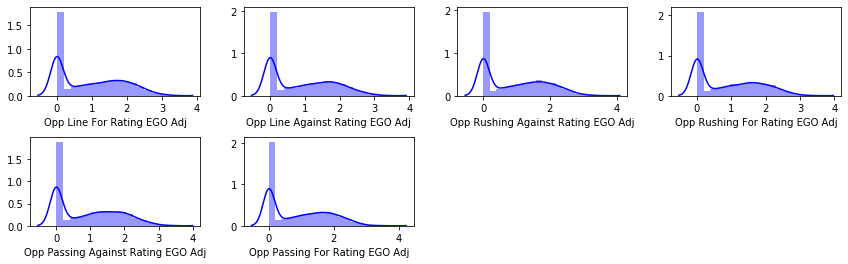

In [21]:
fig = plt.figure(figsize=(12,16))
for i in range(len(df_test[cols_log].columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(df_test[cols_log].iloc[:,i], color='blue')
    plt.xlabel(df_test[cols_log].columns[i])
plt.tight_layout()
plt.show()

### Getting polynomial values

In [22]:
cols_pol = ['Opp Line Against Rating','Opp Line For Rating','Opp Rushing Against Rating',
          'Opp Rushing For Rating','Opp Passing Against Rating','Opp Passing For Rating',
          'Line For Rating','Line Against Rating','Rushing For Rating','Rushing Against Rating',
          'Passing For Rating','Passing Against Rating']
for col in cols_pol:
    df_test[col] = df_test[col]**3

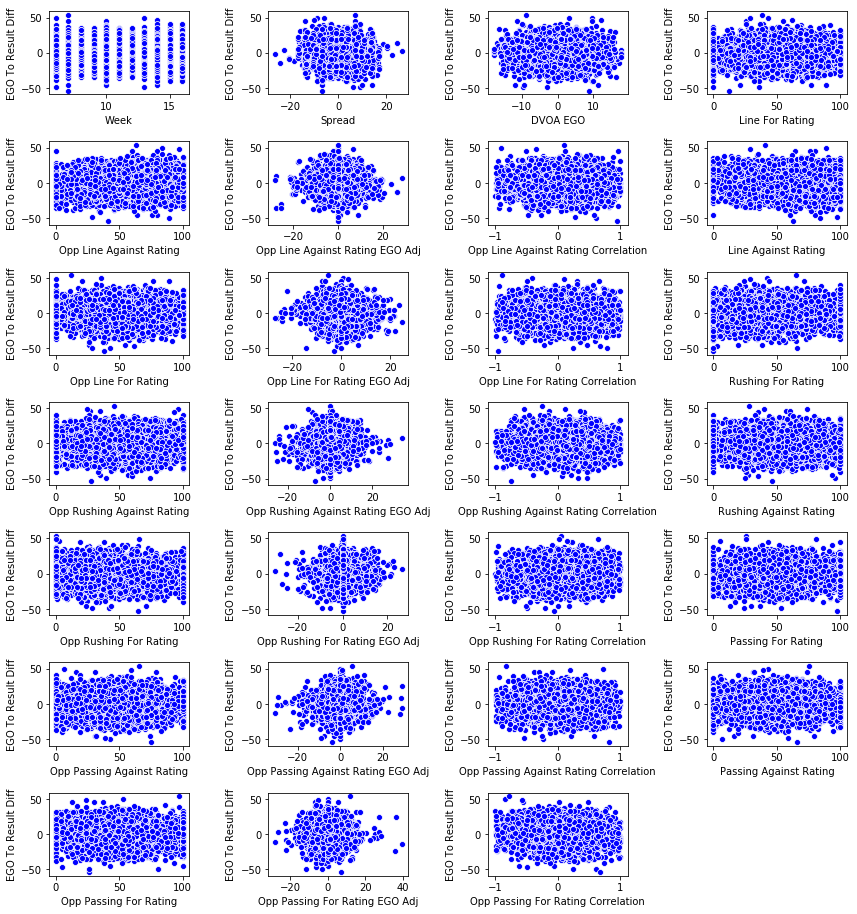

In [23]:
f = plt.figure(figsize=(12,16))
for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], data['EGO To Result Diff'], color='blue')
    
plt.tight_layout()
plt.show()

### Getting rid of the correlation features

In [24]:
corr_cols = []
for i in df_test.columns:
    if 'Corr' in i:
        corr_cols.append(i)

In [25]:
X = df_test.drop(columns = corr_cols)

# Model on processed data

In [26]:
X = df_test.drop(columns = ['EGO To Result Diff'])
y = df_test['EGO To Result Diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=9000)

In [27]:
model_cb_test = CatBoostRegressor(
        iterations=500, 
        learning_rate=0.3,
        depth=4, 
        l2_leaf_reg=6,
        eval_metric='MAPE',
        logging_level='Silent',
        loss_function='MAE',
        random_seed=9000)
model_cb_test.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [28]:
test_table(model_cb_test, X_test, y_test)

Mean absolute percentage error: 100.00022253499498


+ <b> Data manipulation doesn't lead us to decreasing errors

# Conclusion

+ <b> Data looks random and has a zero predictive power for the target variable <br>
+ <b> Getting more features and data might help to get better prediction <br>
+ <b> Analizing data origins could be a good idea for features generation <br>